##Project Predicting Housing Prices using Machine Learning

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests

from io import StringIO
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score , train_test_split

%matplotlib inline

#Importing the data set.
#It can be found here https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data.

In [14]:
url='https://raw.githubusercontent.com/peterkoebel/ProjectPredictHousingPricesMachineLearning/master/train.csv'
s=requests.get(url).text
data = pd.read_csv(StringIO(s))

#Looking over the data.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

#A couple of the columns are missing a significant amount of data. So we will remove those columns.

In [16]:
data = data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

#Let us review the new data set.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

#Next we will get rid of any rows with null values and review the data set.

In [18]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 76 columns):
Id               1094 non-null int64
MSSubClass       1094 non-null int64
MSZoning         1094 non-null object
LotFrontage      1094 non-null float64
LotArea          1094 non-null int64
Street           1094 non-null object
LotShape         1094 non-null object
LandContour      1094 non-null object
Utilities        1094 non-null object
LotConfig        1094 non-null object
LandSlope        1094 non-null object
Neighborhood     1094 non-null object
Condition1       1094 non-null object
Condition2       1094 non-null object
BldgType         1094 non-null object
HouseStyle       1094 non-null object
OverallQual      1094 non-null int64
OverallCond      1094 non-null int64
YearBuilt        1094 non-null int64
YearRemodAdd     1094 non-null int64
RoofStyle        1094 non-null object
RoofMatl         1094 non-null object
Exterior1st      1094 non-null object
Exterior2nd      1094 non

#Now that there are no null values in our data set, we can do some analysis.
#First we will look a the distribution of the Sale Price.

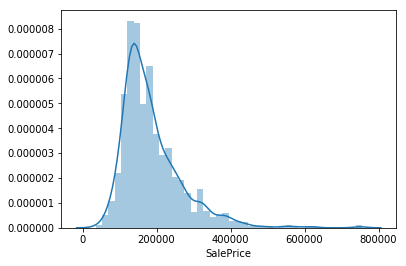

In [19]:
sns.distplot(data.SalePrice);

#This distribution isn't a normal distribution. We will try a Logarithmic distribution to see if it is a more Normal distribution.

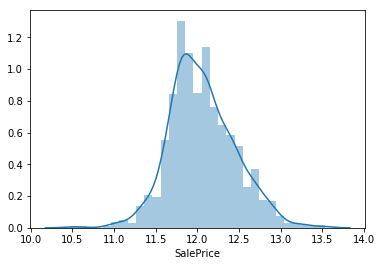

In [20]:
sns.distplot(np.log(data.SalePrice));

#Now we can create a new column based from the logarithm of the Sale price. Then we will remove the Sale Price column. This will be our dependant y variable.

In [21]:
data["LogOfPrice"] = np.log(data.SalePrice)
data.drop(['SalePrice'],axis=1,inplace=True)
y = data.LogOfPrice

#Here we will create a temporary data set for the independant variable X, without the logarthimic price. As that is the variable we want to predict. Also we will only use non-object variables to analyse.

In [24]:
data_temp = data.select_dtypes(include=['int64','float64'])
X = data_temp.drop(['LogOfPrice'],axis=1)

#Next we will split up our data set into train and test data sets. This way we have a control to compare our predictions with.

In [29]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = .25 , random_state = 2)

#Now we will do some machine learning using Linear regression.

In [30]:
lr = LinearRegression()
lr.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
yr_hat = lr.predict(X_test)
lr.score(X_test,y_test)

0.84775504679180236

#Performing cross validation to compare our score.

In [32]:
lr_cvs = cross_val_score(lr, X, y, cv=5 , scoring = 'r2')
lr_cvs

array([ 0.88426462,  0.83605032,  0.86145344,  0.89201551,  0.6154792 ])

In [33]:
lr_cvs.mean()

0.81785261868671666

#Comparing our score of 0.847755 to the cross validation mean of 0.817853, means we might be over fitting a bit.

#Next we will do some machine learning using Ridge regression.

In [34]:
ridge = Ridge(alpha=1)
ridge.fit(X_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

#Performing cross validation to compare our Linear regression value.

In [35]:
ridge_cvs = cross_val_score(ridge,X,y,cv = 5,scoring='r2')
ridge_cvs.mean()

0.81791151186360445

#Our value of 0.8179115 from our Ridge regression is very close to 0.817853 from our Linear regression.

#Now we will peform cross validation using Random Forest regression.

In [36]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [37]:
rfr_cvs = cross_val_score(rfr,X,y,cv = 5,scoring='r2')
rfr_cvs.mean()

0.84234443188411345

#The value of 0.842344 from our Rand Forest regression is very close the the Linear Regression score of 0.847755.

#Here we will analyse the important features to predicting the sale price.

In [38]:
rfr.feature_importances_

array([  9.16546925e-03,   1.57467335e-03,   7.88672315e-03,
         1.53209209e-02,   6.08766842e-01,   1.47940759e-02,
         2.60549763e-02,   1.72378800e-02,   6.34110346e-03,
         1.69804625e-02,   2.85136199e-04,   4.24259564e-03,
         3.55170993e-02,   2.52492552e-02,   7.31647813e-03,
         7.16804674e-05,   1.10767092e-01,   1.16274725e-03,
         4.72367225e-04,   1.04374738e-02,   2.83339086e-04,
         1.23796473e-03,   8.63948899e-04,   3.95419288e-03,
         3.87646000e-03,   7.11012639e-03,   2.32407748e-02,
         1.68070670e-02,   4.03007084e-03,   4.70457365e-03,
         4.01722369e-03,   4.08105461e-04,   1.30105072e-03,
         0.00000000e+00,   6.65441641e-04,   5.22729544e-03,
         2.62731251e-03])

In [39]:
importance = rfr.feature_importances_
feature_importances = zip(importance,X.columns)

In [40]:
sorted_feature_importances = sorted(feature_importances,reverse=True)
sorted_feature_importances

[(0.60876684214438948, 'OverallQual'),
 (0.11076709201830262, 'GrLivArea'),
 (0.03551709925458417, 'TotalBsmtSF'),
 (0.026054976272311438, 'YearBuilt'),
 (0.025249255244689926, '1stFlrSF'),
 (0.023240774815858133, 'GarageCars'),
 (0.01723787999255421, 'YearRemodAdd'),
 (0.0169804625259482, 'BsmtFinSF1'),
 (0.016807067028079478, 'GarageArea'),
 (0.015320920884263617, 'LotArea'),
 (0.014794075934467438, 'OverallCond'),
 (0.010437473841436701, 'FullBath'),
 (0.0091654692538065928, 'Id'),
 (0.0078867231507207779, 'LotFrontage'),
 (0.0073164781271450484, '2ndFlrSF'),
 (0.0071101263856467979, 'GarageYrBlt'),
 (0.0063411034604729261, 'MasVnrArea'),
 (0.0052272954371936856, 'MoSold'),
 (0.0047045736482025421, 'OpenPorchSF'),
 (0.0042425956352814586, 'BsmtUnfSF'),
 (0.0040300708360180891, 'WoodDeckSF'),
 (0.0040172236906127097, 'EnclosedPorch'),
 (0.0039541928750995914, 'TotRmsAbvGrd'),
 (0.0038764600039255803, 'Fireplaces'),
 (0.0026273125095080336, 'YrSold'),
 (0.0015746733480661429, 'MSSubCl

#We will focus on the top 12 important features for further analysis.

In [41]:
top_predictors = sorted_feature_importances[0:12]
values = [value for value, predictors in top_predictors]

In [42]:
predictors = [predictors for value, predictors in top_predictors]
predictors

['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 'YearBuilt',
 '1stFlrSF',
 'GarageCars',
 'YearRemodAdd',
 'BsmtFinSF1',
 'GarageArea',
 'LotArea',
 'OverallCond',
 'FullBath']

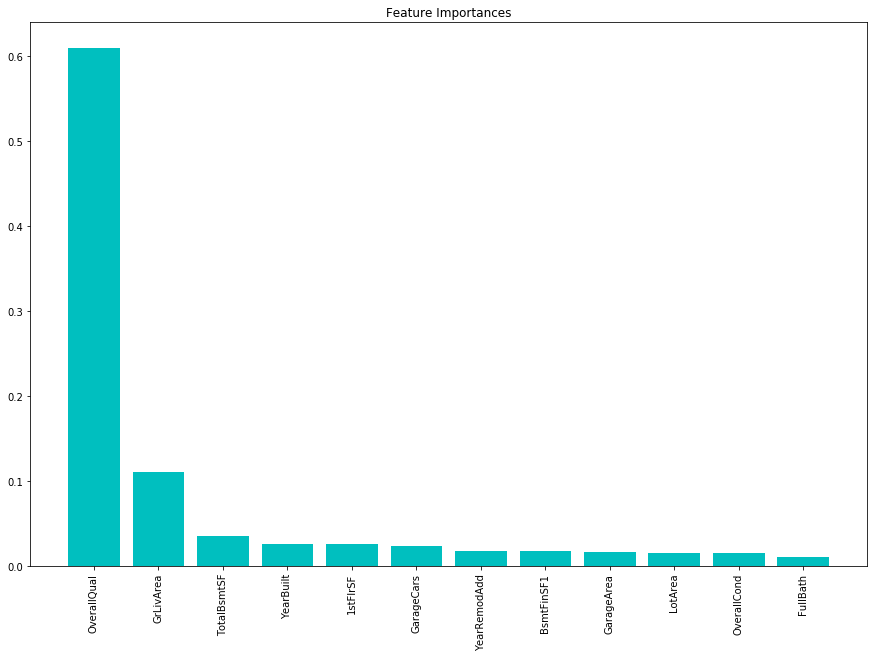

In [43]:
plt.figure(figsize=(15,10))
plt.title("Feature Importances")

plt.bar(range(len(predictors)),values,color='c',align='center')

plt.xticks(range(len(predictors)),predictors,rotation=90);

#By far the most important feature to predict the sale price of a house is its overall quality. Which is the rating of the overall material and finish of the house.
#Second most import feature is the above grade (ground) living area. With total square feet of basement area coming in third.